In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def remove_outliers(x):
    # Get 5% and 9% percentiles
    q5, q95 = np.percentile(x, [5, 95])
    # Remove outliers outside percentiles
    return x[(x < q95) & (x > q5)]

def get_avg_med(x):
    return np.average(x), np.median(x)

def create_hists(x1, x2, bins, plot_title, filename=None):
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(10,5))

    # Create histogram
    axs[0].hist(x1, density=False, bins=bins)
    axs[1].hist(x2, density=False, bins=bins)

    # Create big subplot to have shared axes
    fig.add_subplot(111, frameon=False)
    # Hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

    # Plot average and median
    min_ylim, max_ylim = axs[0].get_ylim()

    x1_avg, x1_med = get_avg_med(x1)
    x2_avg, x2_med = get_avg_med(x2)

    # Create lines for average and median - x1
    axs[0].axvline(x1_avg, color='k', linestyle='dashed', linewidth=1)
    axs[0].text(x1_avg*1.005, max_ylim*0.9, 'Average: {:.4f}'.format(x1_avg))
    axs[0].axvline(x1_med, color='k', linestyle='dashed', linewidth=1)
    axs[0].text(x1_med*1.005, max_ylim*0.8, 'Median: {:.4f}'.format(x1_med))

    # Create lines for average and median - x2
    axs[1].axvline(x2_avg, color='k', linestyle='dashed', linewidth=1)
    axs[1].text(x2_avg*1.005, max_ylim*0.9, 'Average: {:.4f}'.format(x2_avg))
    axs[1].axvline(x2_med, color='k', linestyle='dashed', linewidth=1)
    axs[1].text(x2_med*1.005, max_ylim*0.8, 'Median: {:.4f}'.format(x2_med))

    # Get min and max xlims
    xlim1 = axs[0].get_xlim()
    xlim2 = axs[1].get_xlim()
    xlim_min = min(xlim1[0], xlim2[0])
    xlim_max = max(xlim1[1], xlim2[1])

    # Ser xlims
    #plt.setp(axs[0], xlim=(xlim_min, xlim_max))
    #plt.setp(axs[1], xlim=(xlim_min, xlim_max))

    # Insert labels etc.
    fig.suptitle(plot_title)
    axs[0].set_title("Strategy 1")
    axs[1].set_title("Strategy 2")
    #axs[0].set(xlabel='x-label', ylabel='y-label')
    plt.ylabel('Count')
    plt.xlabel('Time (ms)');
    #axs[1].xlabel('Time (ms)');


    plt.show()
    if filename is not None:
        fig.savefig(filename)

def plot_data(x1, x2, plot_title, filename=None):
    x1_new = remove_outliers(x1)
    x2_new = remove_outliers(x2)

    create_hists(x1_new, x2_new, 20, plot_title, filename)

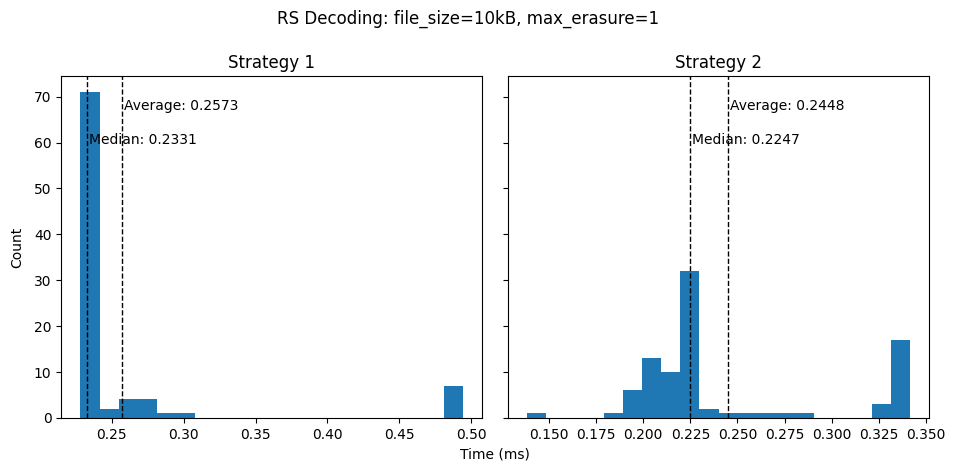

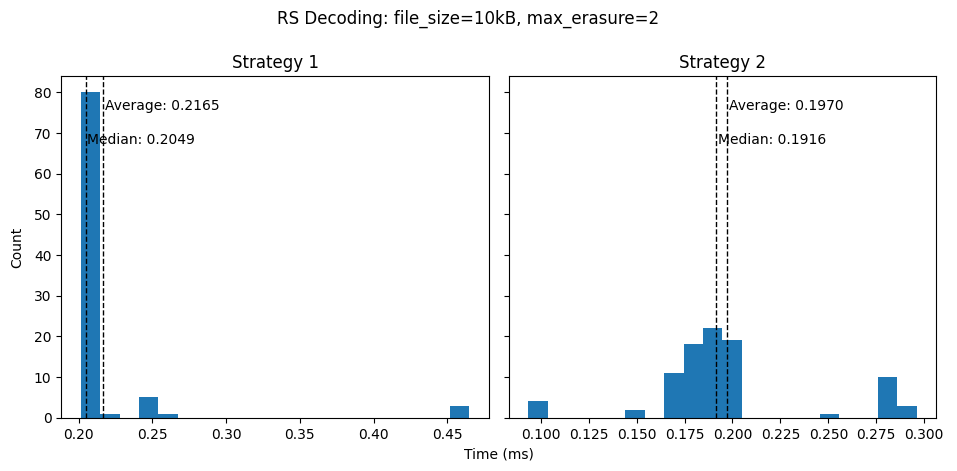

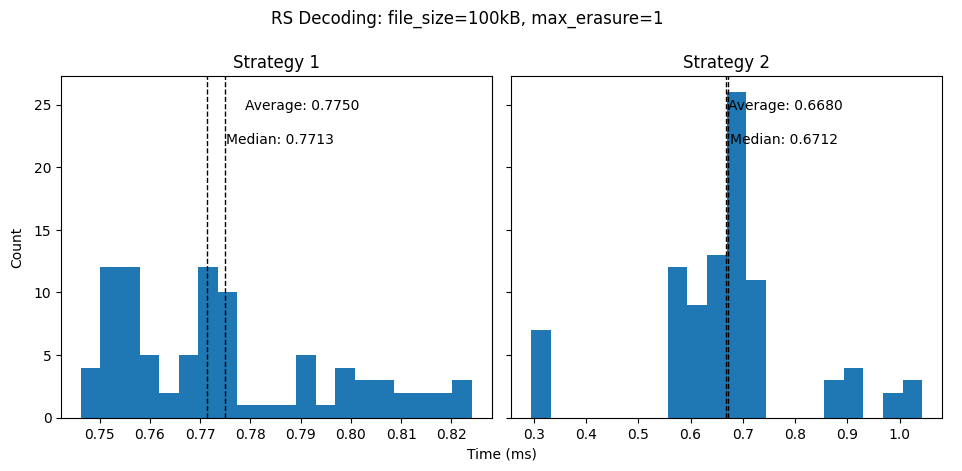

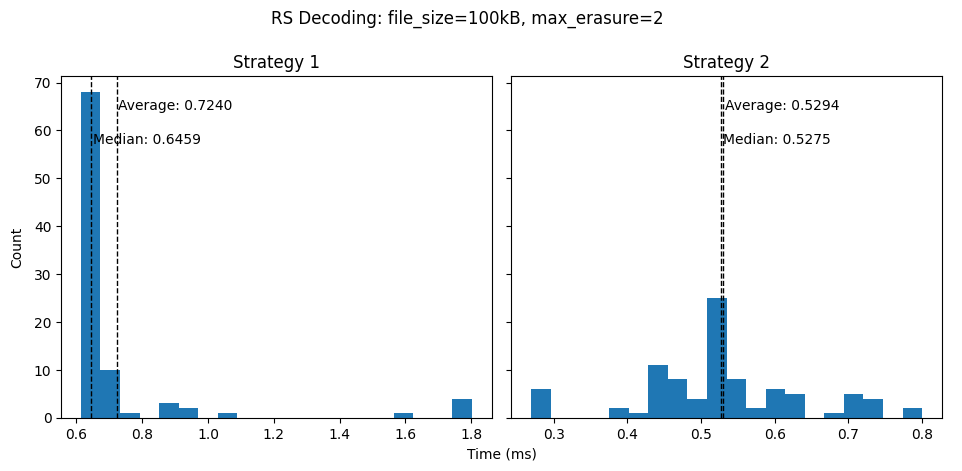

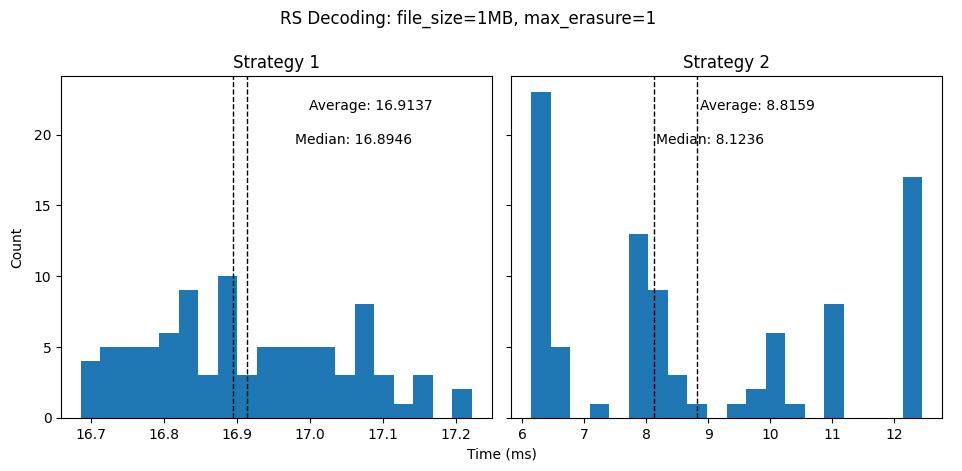

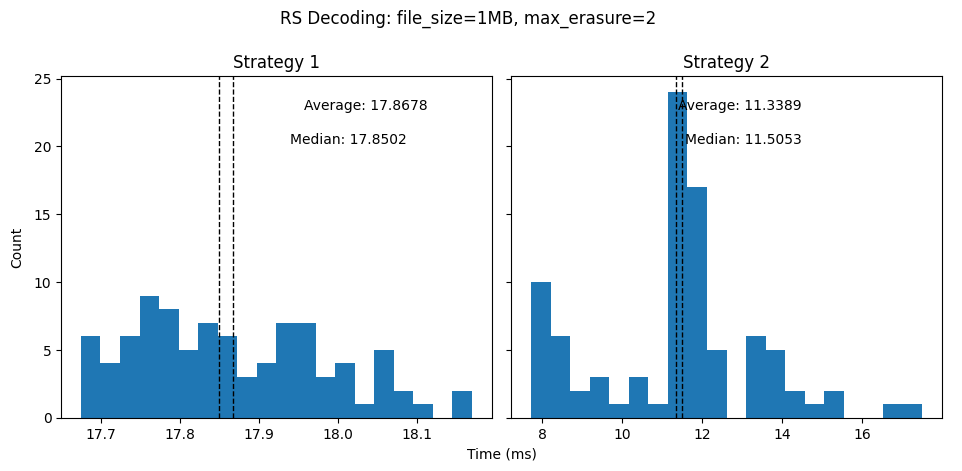

In [4]:
##### DECODE #####
# Create Pandas dataframe
df1 = pd.read_csv("results/log_decode_t1.txt", index_col=None, header=None, names=['Size', 'Max Erasures', 'Time'])
df1.insert(2, 'Type', 1)
df2 = pd.read_csv("results/log_decode_t2.txt", index_col=None, header=None, names=['Size', 'Max Erasures', 'Time'])
df2.insert(2, 'Type', 2)

df = pd.concat([df1, df2])

df['Size'] = df['Size'].replace([10242, 10240], '10kB')
df['Size'] = df['Size'].replace([102402, 102400], '100kB')
df['Size'] = df['Size'].replace([1048578, 1048576], '1MB')

t1_me1_10kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '10kB'), 'Time'].values * 1000
t2_me1_10kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '10kB'), 'Time'].values * 1000
t1_me2_10kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '10kB'), 'Time'].values * 1000
t2_me2_10kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '10kB'), 'Time'].values * 1000

t1_me1_100kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '100kB'), 'Time'].values * 1000
t2_me1_100kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '100kB'), 'Time'].values * 1000
t1_me2_100kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '100kB'), 'Time'].values * 1000
t2_me2_100kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '100kB'), 'Time'].values * 1000

t1_me1_1MB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '1MB'), 'Time'].values * 1000
t2_me1_1MB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '1MB'), 'Time'].values * 1000
t1_me2_1MB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '1MB'), 'Time'].values * 1000
t2_me2_1MB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '1MB'), 'Time'].values * 1000

plot_data(t1_me1_10kB, t2_me1_10kB, "RS Decoding: file_size=10kB, max_erasure=1", "results/decode_me1_10kB.png")
plot_data(t1_me2_10kB, t2_me2_10kB, "RS Decoding: file_size=10kB, max_erasure=2", "results/decode_me2_10kB.png")
plot_data(t1_me1_100kB, t2_me1_100kB, "RS Decoding: file_size=100kB, max_erasure=1", "results/decode_me1_100kB.png")
plot_data(t1_me2_100kB, t2_me2_100kB, "RS Decoding: file_size=100kB, max_erasure=2", "results/decode_me2_100kB.png")
plot_data(t1_me1_1MB, t2_me1_1MB, "RS Decoding: file_size=1MB, max_erasure=1", "results/decode_me1_1MB.png")
plot_data(t1_me2_1MB, t2_me2_1MB, "RS Decoding: file_size=1MB, max_erasure=2", "results/decode_me2_1MB.png")

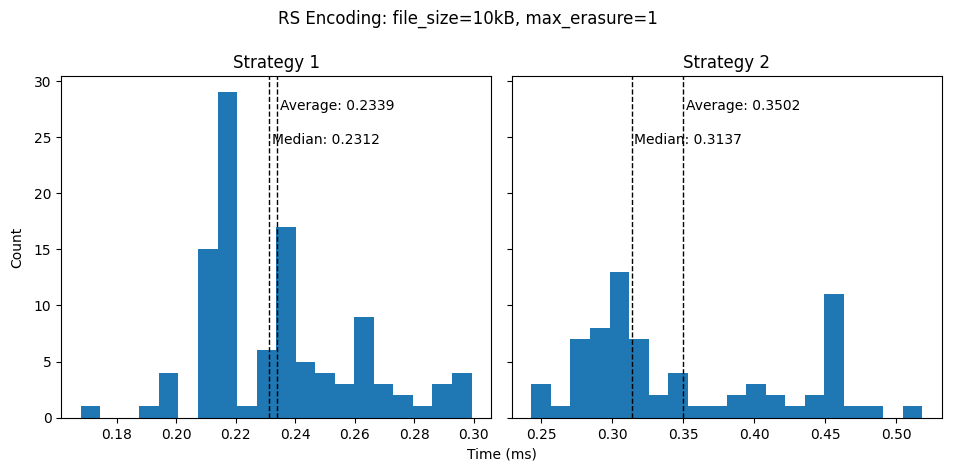

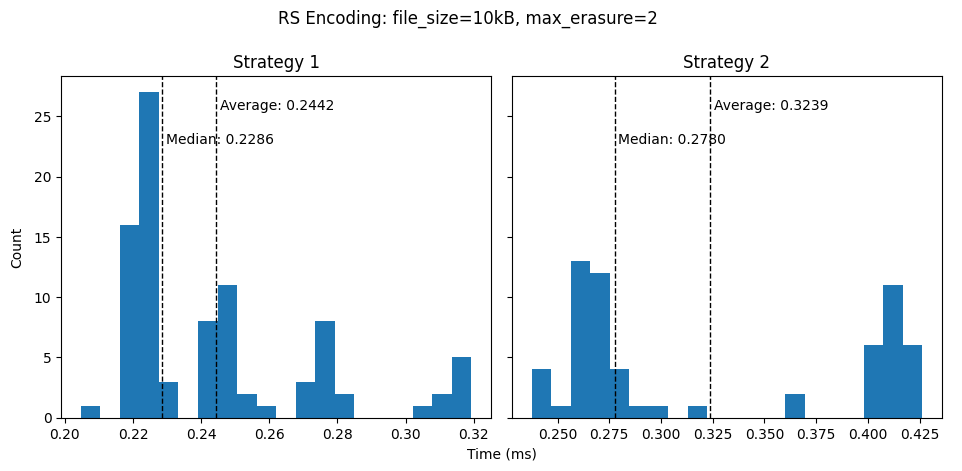

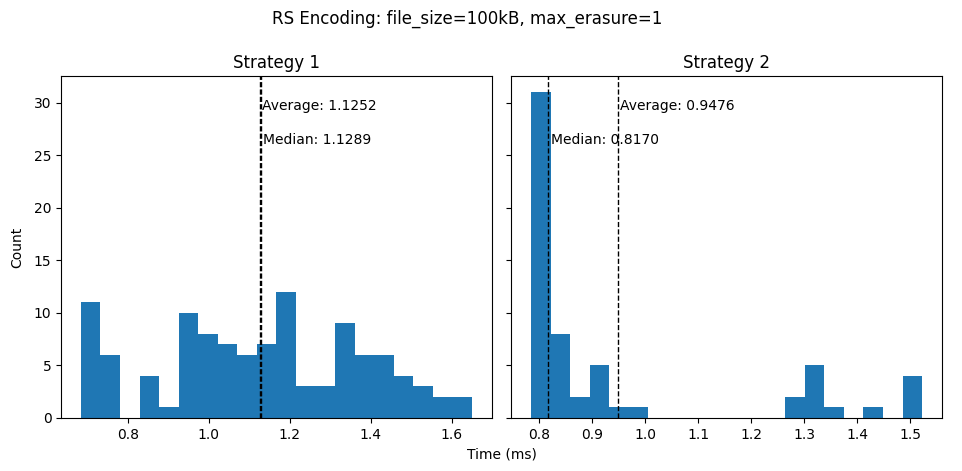

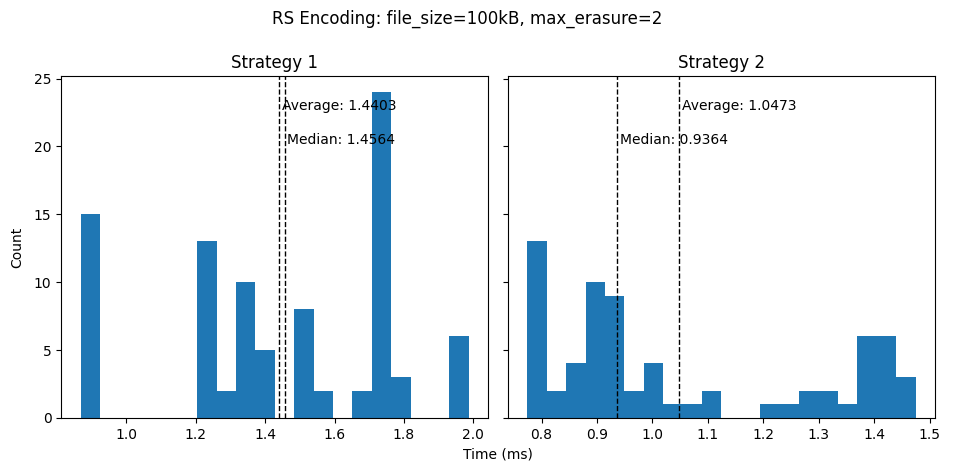

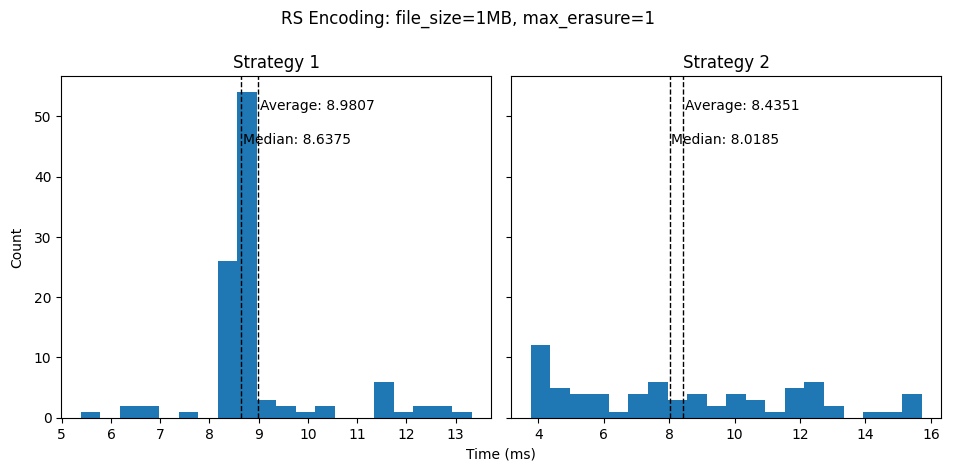

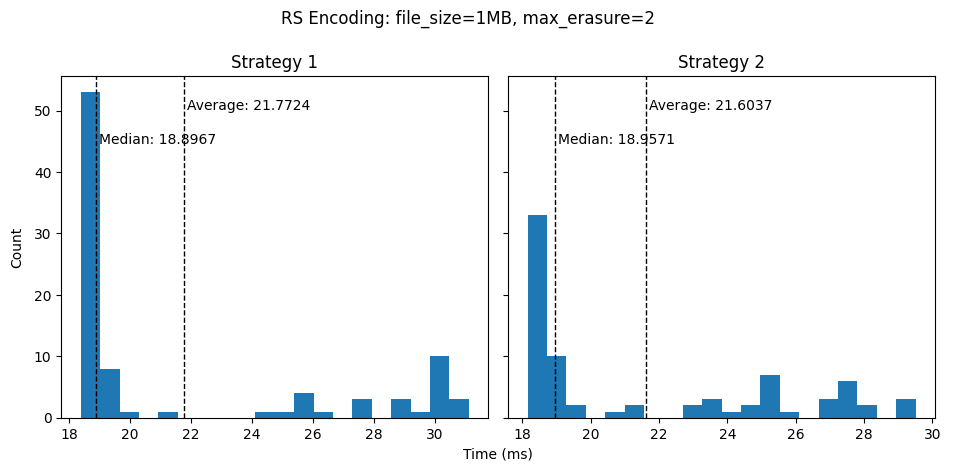

In [5]:
##### ENCODE #####
# Create Pandas dataframe
df1 = pd.read_csv("results/log_encode_t1.txt", index_col=None, header=None, names=['Size', 'Max Erasures', 'Time'])
df1.insert(2, 'Type', 1)
df2 = pd.read_csv("results/log_encode_t2.txt", index_col=None, header=None, names=['Size', 'Max Erasures', 'Time'])
df2.insert(2, 'Type', 2)

df = pd.concat([df1, df2])

df['Size'] = df['Size'].replace([10242, 10240], '10kB')
df['Size'] = df['Size'].replace([102402, 102400], '100kB')
df['Size'] = df['Size'].replace([1048578, 1048576], '1MB')

t1_me1_10kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '10kB'), 'Time'].values * 1000
t2_me1_10kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '10kB'), 'Time'].values * 1000
t1_me2_10kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '10kB'), 'Time'].values * 1000
t2_me2_10kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '10kB'), 'Time'].values * 1000

t1_me1_100kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '100kB'), 'Time'].values * 1000
t2_me1_100kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '100kB'), 'Time'].values * 1000
t1_me2_100kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '100kB'), 'Time'].values * 1000
t2_me2_100kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '100kB'), 'Time'].values * 1000

t1_me1_1MB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '1MB'), 'Time'].values * 1000
t2_me1_1MB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '1MB'), 'Time'].values * 1000
t1_me2_1MB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '1MB'), 'Time'].values * 1000
t2_me2_1MB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '1MB'), 'Time'].values * 1000

plot_data(t1_me1_10kB, t2_me1_10kB, "RS Encoding: file_size=10kB, max_erasure=1", "results/encode_me1_10kB.png")
plot_data(t1_me2_10kB, t2_me2_10kB, "RS Encoding: file_size=10kB, max_erasure=2", "results/encode_me2_10kB.png")
plot_data(t1_me1_100kB, t2_me1_100kB, "RS Encoding: file_size=100kB, max_erasure=1", "results/encode_me1_100kB.png")
plot_data(t1_me2_100kB, t2_me2_100kB, "RS Encoding: file_size=100kB, max_erasure=2", "results/encode_me2_100kB.png")
plot_data(t1_me1_1MB, t2_me1_1MB, "RS Encoding: file_size=1MB, max_erasure=1", "results/encode_me1_1MB.png")
plot_data(t1_me2_1MB, t2_me2_1MB, "RS Encoding: file_size=1MB, max_erasure=2", "results/encode_me2_1MB.png")

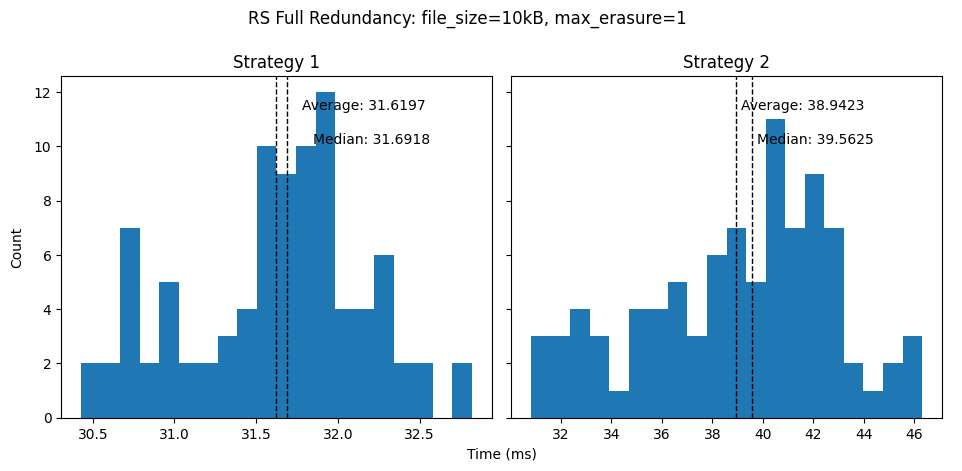

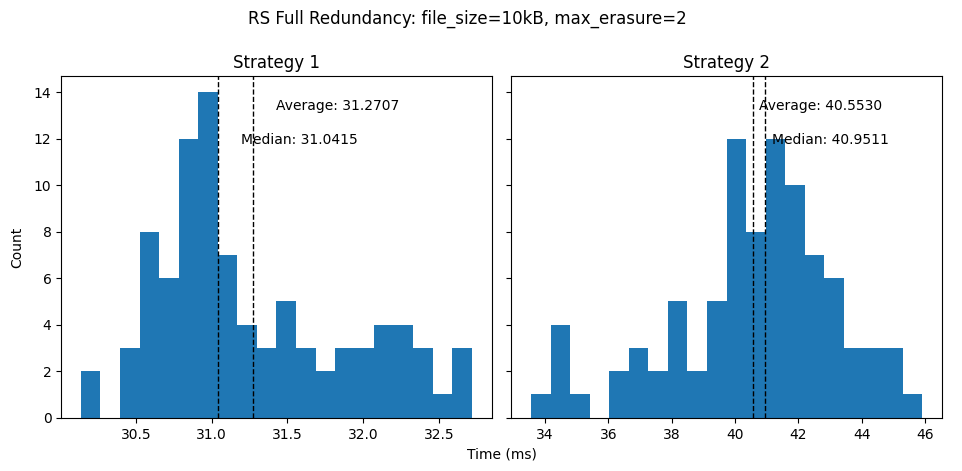

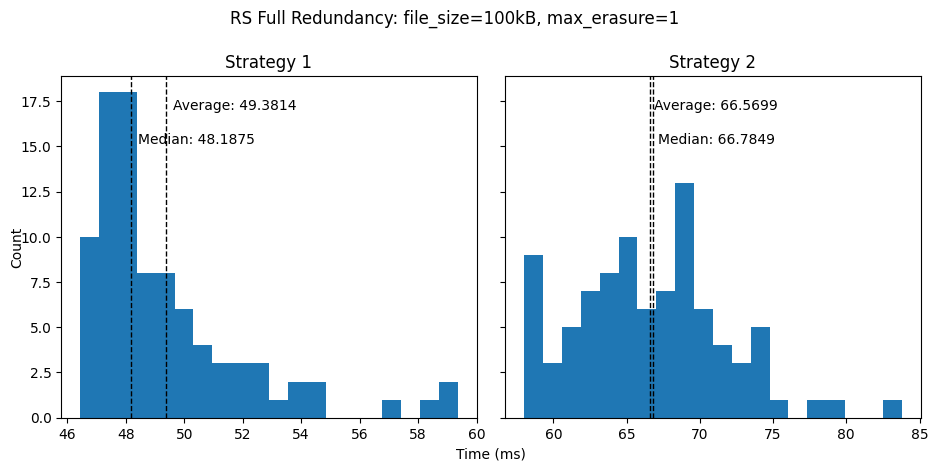

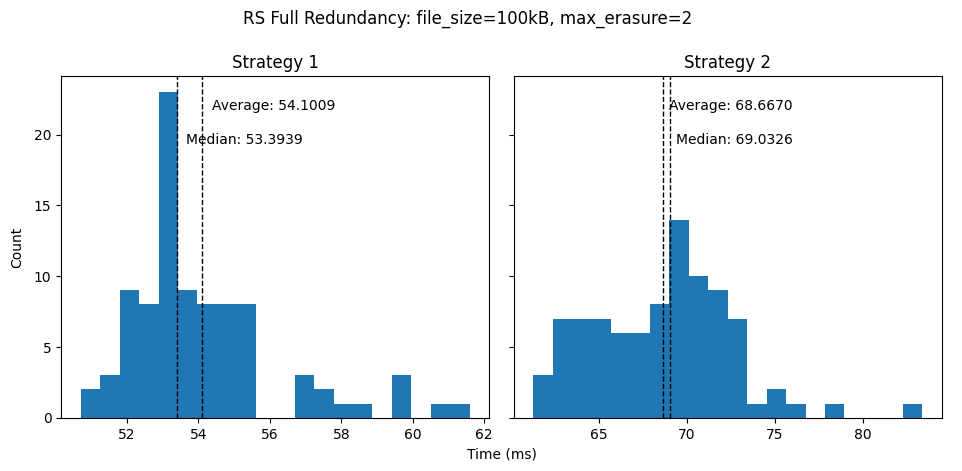

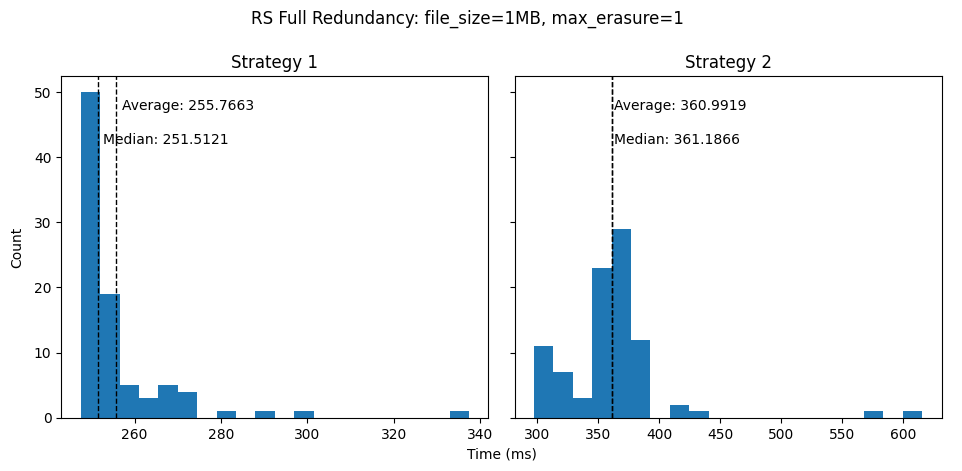

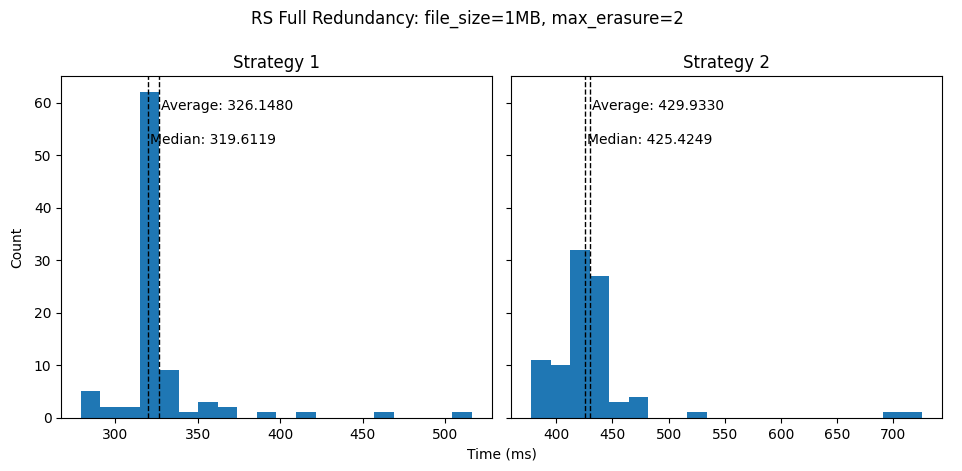

In [6]:
##### FULL REDUNDANCY #####
# Create Pandas dataframe
df1 = pd.read_csv("results/log_fullredun_t1.txt", index_col=None, header=None, names=['Size', 'Max Erasures', 'Time'])
df1.insert(2, 'Type', 1)
df2 = pd.read_csv("results/log_fullredun_t2.txt", index_col=None, header=None, names=['Size', 'Max Erasures', 'Time'])
df2.insert(2, 'Type', 2)

df = pd.concat([df1, df2])

df['Size'] = df['Size'].replace([10242, 10240], '10kB')
df['Size'] = df['Size'].replace([102402, 102400], '100kB')
df['Size'] = df['Size'].replace([1048578, 1048576], '1MB')

t1_me1_10kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '10kB'), 'Time'].values * 1000
t2_me1_10kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '10kB'), 'Time'].values * 1000
t1_me2_10kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '10kB'), 'Time'].values * 1000
t2_me2_10kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '10kB'), 'Time'].values * 1000

t1_me1_100kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '100kB'), 'Time'].values * 1000
t2_me1_100kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '100kB'), 'Time'].values * 1000
t1_me2_100kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '100kB'), 'Time'].values * 1000
t2_me2_100kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '100kB'), 'Time'].values * 1000

t1_me1_1MB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '1MB'), 'Time'].values * 1000
t2_me1_1MB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '1MB'), 'Time'].values * 1000
t1_me2_1MB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '1MB'), 'Time'].values * 1000
t2_me2_1MB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '1MB'), 'Time'].values * 1000

plot_data(t1_me1_10kB, t2_me1_10kB, "RS Full Redundancy: file_size=10kB, max_erasure=1", "results/redundancy_me1_10kB.png")
plot_data(t1_me2_10kB, t2_me2_10kB, "RS Full Redundancy: file_size=10kB, max_erasure=2", "results/redundancy_me2_10kB.png")
plot_data(t1_me1_100kB, t2_me1_100kB, "RS Full Redundancy: file_size=100kB, max_erasure=1", "results/redundancy_me1_100kB.png")
plot_data(t1_me2_100kB, t2_me2_100kB, "RS Full Redundancy: file_size=100kB, max_erasure=2", "results/redundancy_me2_100kB.png")
plot_data(t1_me1_1MB, t2_me1_1MB, "RS Full Redundancy: file_size=1MB, max_erasure=1", "results/redundancy_me1_1MB.png")
plot_data(t1_me2_1MB, t2_me2_1MB, "RS Full Redundancy: file_size=1MB, max_erasure=2", "results/redundancy_me2_1MB.png")

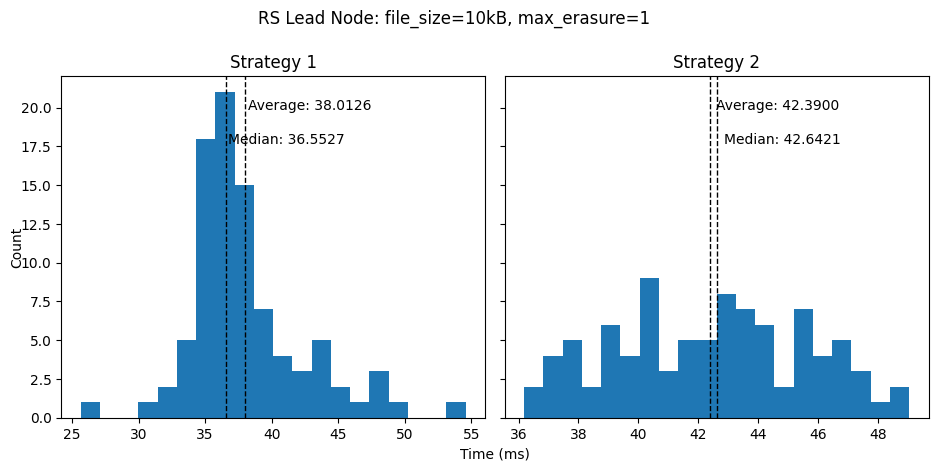

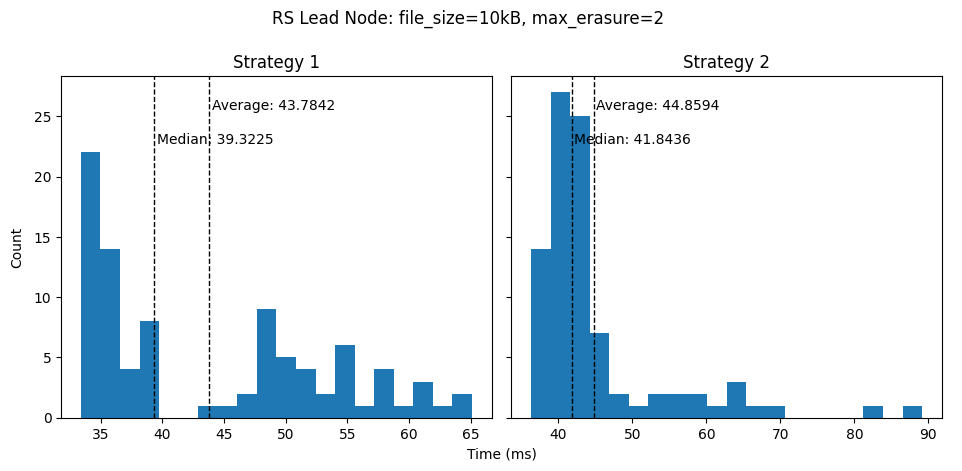

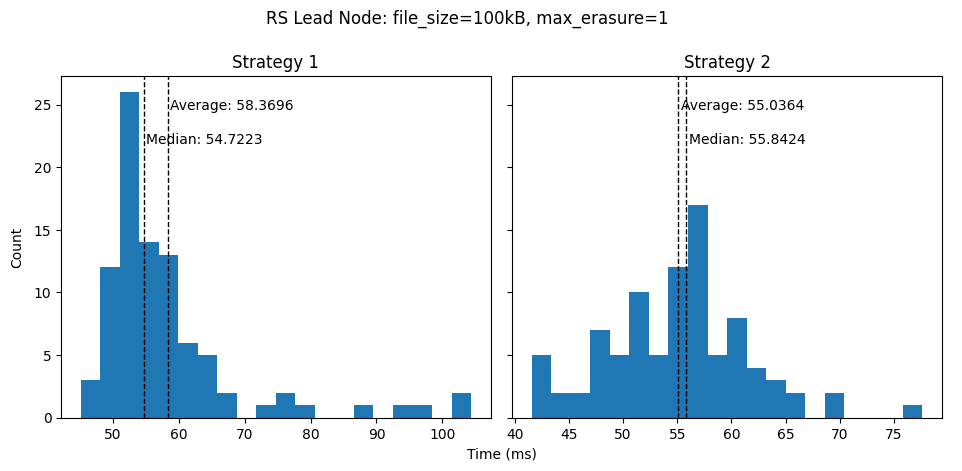

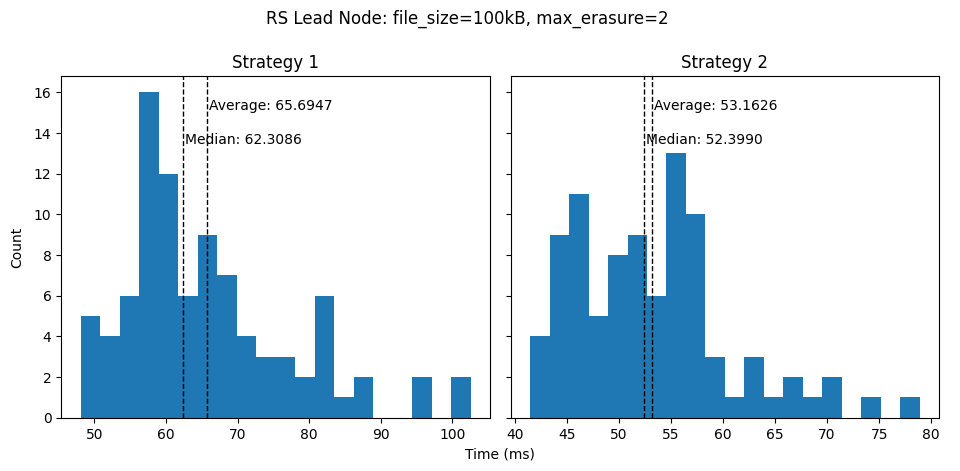

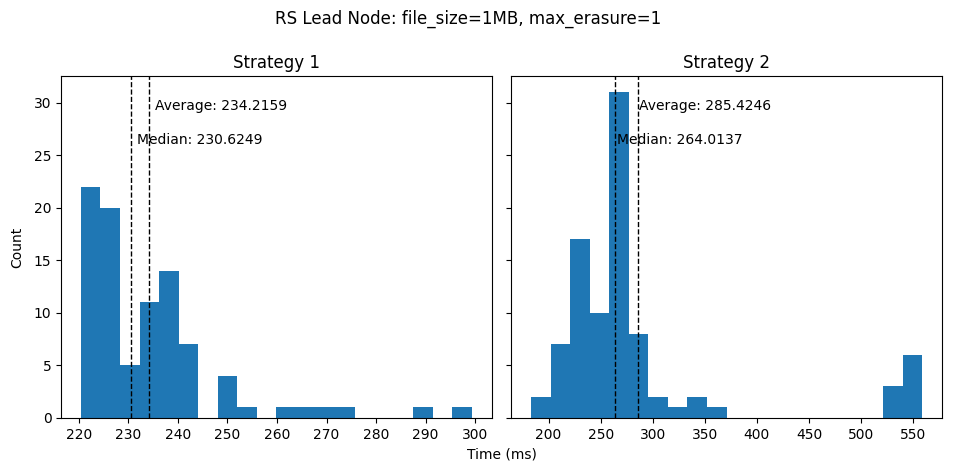

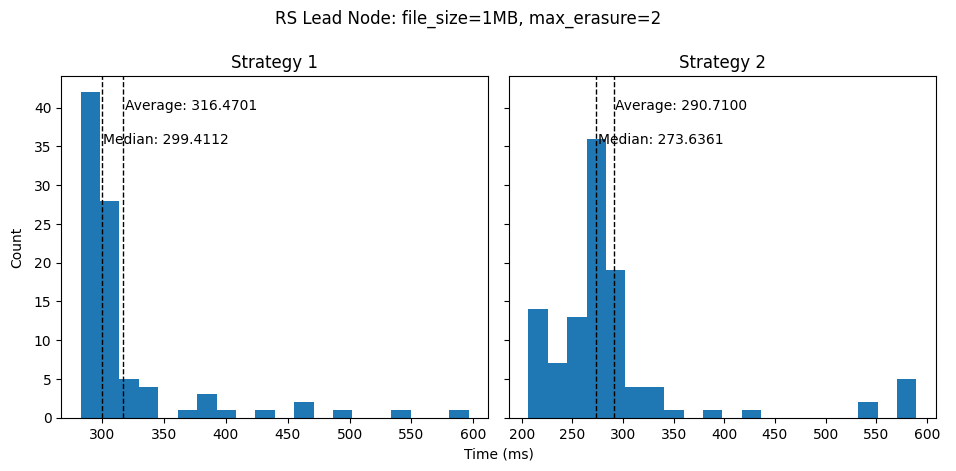

In [7]:
##### LEAD NDOE #####
# Create Pandas dataframe
df1 = pd.read_csv("results/log_leadnode_t1.txt", index_col=None, header=None, names=['Size', 'Max Erasures', 'Time'])
df1.insert(2, 'Type', 1)
df2 = pd.read_csv("results/log_leadnode_t2.txt", index_col=None, header=None, names=['Size', 'Max Erasures', 'Time'])
df2.insert(2, 'Type', 2)

df = pd.concat([df1, df2])

df['Size'] = df['Size'].replace([10242, 10240], '10kB')
df['Size'] = df['Size'].replace([102402, 102400], '100kB')
df['Size'] = df['Size'].replace([1048578, 1048576], '1MB')

t1_me1_10kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '10kB'), 'Time'].values * 1000
t2_me1_10kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '10kB'), 'Time'].values * 1000
t1_me2_10kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '10kB'), 'Time'].values * 1000
t2_me2_10kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '10kB'), 'Time'].values * 1000

t1_me1_100kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '100kB'), 'Time'].values * 1000
t2_me1_100kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '100kB'), 'Time'].values * 1000
t1_me2_100kB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '100kB'), 'Time'].values * 1000
t2_me2_100kB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '100kB'), 'Time'].values * 1000

t1_me1_1MB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 1) & (df['Size'] == '1MB'), 'Time'].values * 1000
t2_me1_1MB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 1) & (df['Size'] == '1MB'), 'Time'].values * 1000
t1_me2_1MB = df.loc[(df['Type'] == 1) & (df['Max Erasures'] == 2) & (df['Size'] == '1MB'), 'Time'].values * 1000
t2_me2_1MB = df.loc[(df['Type'] == 2) & (df['Max Erasures'] == 2) & (df['Size'] == '1MB'), 'Time'].values * 1000

plot_data(t1_me1_10kB, t2_me1_10kB, "RS Lead Node: file_size=10kB, max_erasure=1", "results/lead_node_me1_10kB.png")
plot_data(t1_me2_10kB, t2_me2_10kB, "RS Lead Node: file_size=10kB, max_erasure=2", "results/lead_node_me2_10kB.png")
plot_data(t1_me1_100kB, t2_me1_100kB, "RS Lead Node: file_size=100kB, max_erasure=1", "results/lead_node_me1_100kB.png")
plot_data(t1_me2_100kB, t2_me2_100kB, "RS Lead Node: file_size=100kB, max_erasure=2", "results/lead_node_me2_100kB.png")
plot_data(t1_me1_1MB, t2_me1_1MB, "RS Lead Node: file_size=1MB, max_erasure=1", "results/lead_node_me1_1MB.png")
plot_data(t1_me2_1MB, t2_me2_1MB, "RS Lead Node: file_size=1MB, max_erasure=2", "results/lead_node_me2_1MB.png")

In [9]:
df = pd.read_json('results/download_t1.json')
print(df)

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

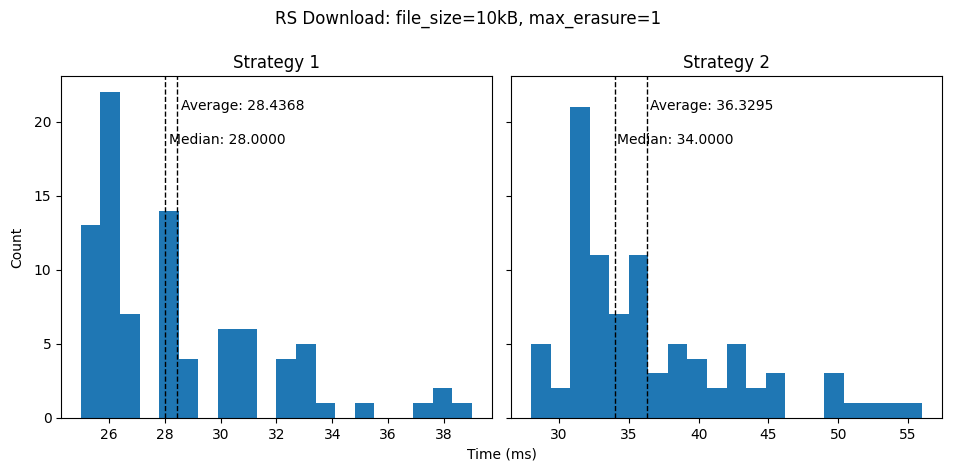

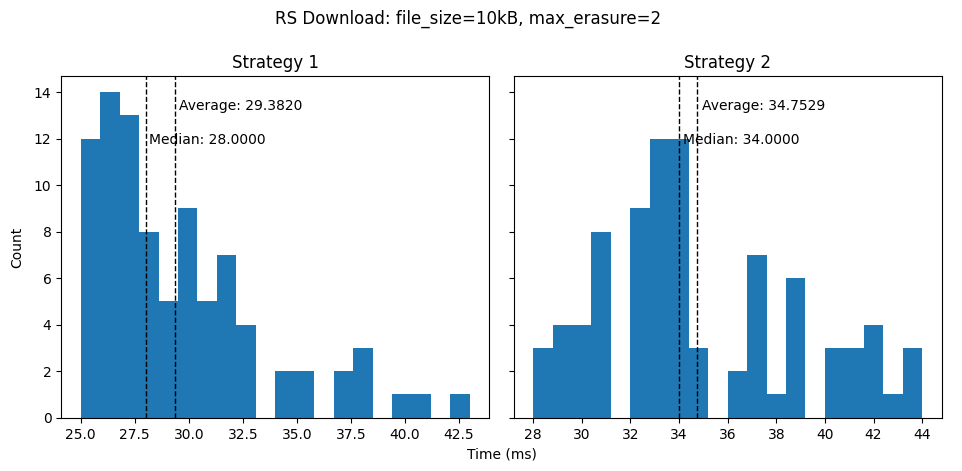

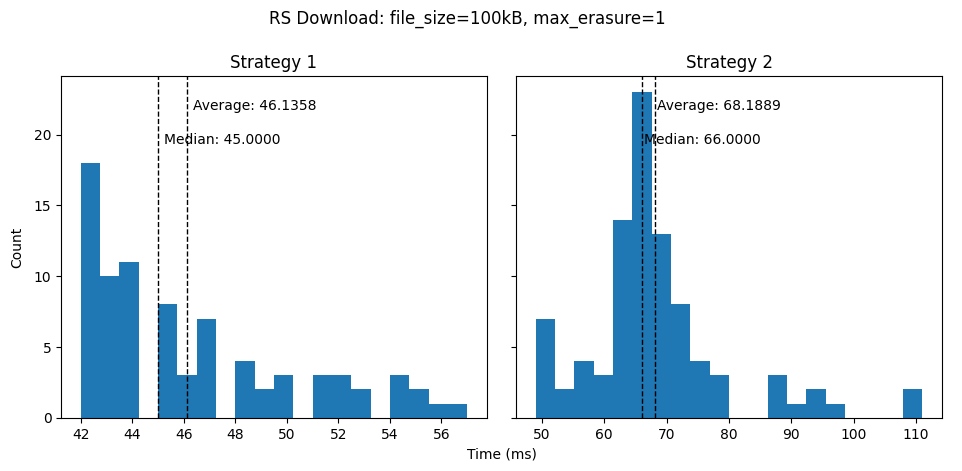

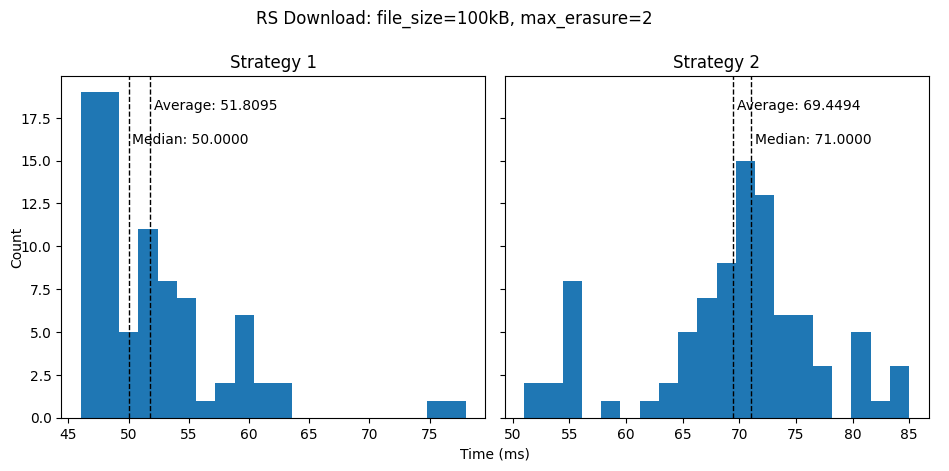

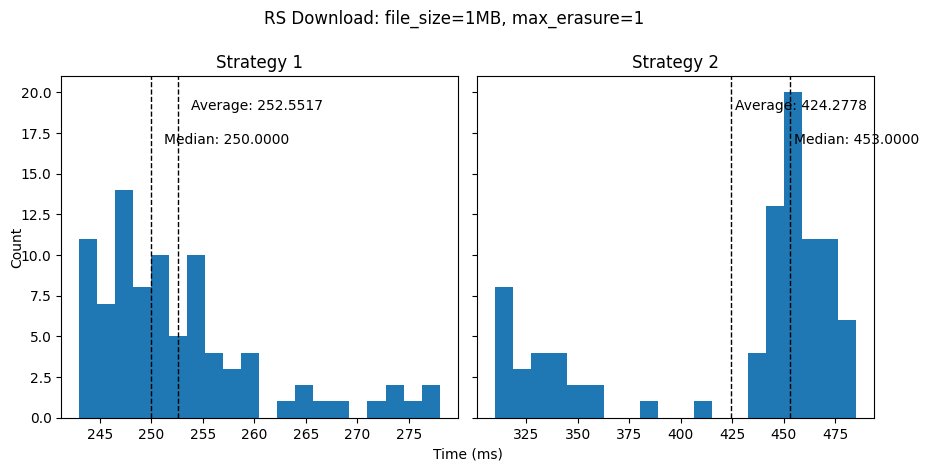

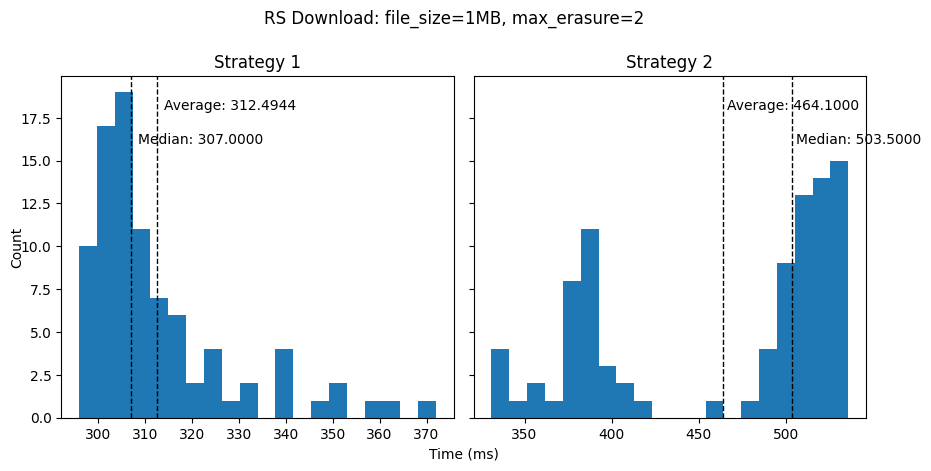

In [25]:
import json

f = open("results/download_t1.json")
data = json.load(f)
f.close()

results = data['results']

t1_me1_10kB = np.array(results[0]['times'])
t1_me1_100kB = np.array(results[1]['times'])
t1_me1_1MB = np.array(results[2]['times'])

t1_me2_10kB = np.array(results[3]['times'])
t1_me2_100kB = np.array(results[4]['times'])
t1_me2_1MB = np.array(results[5]['times'])


f = open("results/download_t2.json")
data = json.load(f)
f.close()

results = data['results']

t2_me1_10kB = np.array(results[0]['times'])
t2_me1_100kB = np.array(results[1]['times'])
t2_me1_1MB = np.array(results[2]['times'])

t2_me2_10kB = np.array(results[3]['times'])
t2_me2_100kB = np.array(results[4]['times'])
t2_me2_1MB = np.array(results[5]['times'])

plot_data(t1_me1_10kB, t2_me1_10kB, "RS Download: file_size=10kB, max_erasure=1", "results/download_me1_10kB.png")
plot_data(t1_me2_10kB, t2_me2_10kB, "RS Download: file_size=10kB, max_erasure=2", "results/download_me2_10kB.png")
plot_data(t1_me1_100kB, t2_me1_100kB, "RS Download: file_size=100kB, max_erasure=1", "results/download_me1_100kB.png")
plot_data(t1_me2_100kB, t2_me2_100kB, "RS Download: file_size=100kB, max_erasure=2", "results/download_me2_100kB.png")
plot_data(t1_me1_1MB, t2_me1_1MB, "RS Download: file_size=1MB, max_erasure=1", "results/download_me1_1MB.png")
plot_data(t1_me2_1MB, t2_me2_1MB, "RS Download: file_size=1MB, max_erasure=2", "results/download_me2_1MB.png")


In [ ]:
# OLD

In [18]:
# Open file
f = open("results/log_decode_type1.txt", "r")
file = f.readlines()
f.close()

# Create lists for data
kb10_l1_t1, kb10_l2_t1 = [],[]
kb100_l1_t1, kb100_l2_t1 = [],[]
mb1_l1_t1, mb1_l2_t1 = [],[]

kb10_l1_t2, kb10_l2_t2 = [],[]
kb100_l1_t2, kb100_l2_t2 = [],[]
mb1_l1_t2, mb1_l2_t2 = [],[]

# Split file into lists

for line in file:
    #print(line)
    number = float(line.split(',')[-1].strip('\n'))
    if line.startswith("10242,1"):
        kb10_l1_t1.append(number)
    elif line.startswith("10240,2"):
        kb10_l2.append(number)
    elif line.startswith("102402,1"):
        kb100_1.append(number)
    elif line.startswith("102400,2"):
        kb100_2.append(number)
    elif line.startswith("1048578,1"):
        mb1_1.append(number)
    elif line.startswith("1048576,2"):
        mb1_2.append(number)

# Create np arrays
kb10_1_np = np.array(kb10_1)
kb10_2_np = np.array(kb10_2)
kb100_1_np = np.array(kb100_1)
kb100_2_np = np.array(kb100_2)
mb1_1_np = np.array(mb1_1)
mb1_2_np = np.array(mb1_2)

print(len(kb10_1_np))
print(len(kb10_2_np))
print(len(kb100_1_np))
print(len(kb100_2_np))
print(len(mb1_1_np))
print(len(mb1_2_np))

100
100
100
100
100
100


In [20]:
# Get data in ms
x = kb10_1_np*1000

In [21]:
# Get 5% and 9% percentiles
q5, q95 = np.percentile(x, [5, 95])

# Remove outliers outside percentiles
x_clipped = x[(x < q95) & (x > q5)]

# Get average and median
avg = np.average(x_clipped)
median = np.median(x_clipped)

In [22]:
# Something i found online to determine number of bins to use in histogram
# I don't use it, since the result doesn't make sense to use
q25, q75 = np.percentile(x_clipped, [25, 75])
bin_width = 2 * (q75 - q25) * len(x_clipped) ** (-1/3)
bins = round((x_clipped.max() - x_clipped.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

Freedman–Diaconis number of bins: 5


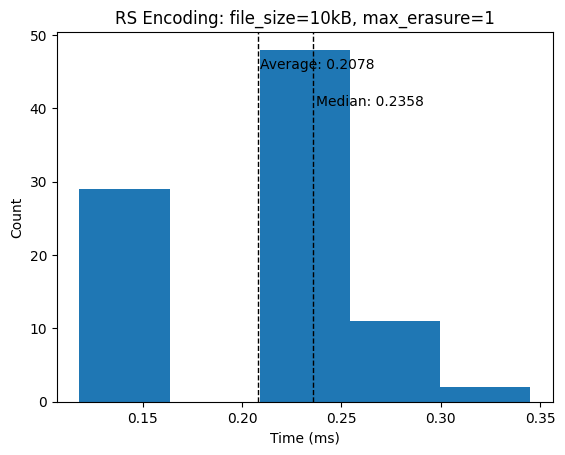

In [25]:
# Create histogram
plt.hist(x_clipped, density=False, bins=5)  # density=False would make counts

# Create lines for average and median
min_ylim, max_ylim = plt.ylim()
plt.axvline(avg, color='k', linestyle='dashed', linewidth=1)
plt.text(avg*1.005, max_ylim*0.9, 'Average: {:.4f}'.format(avg))
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.text(median*1.005, max_ylim*0.8, 'Median: {:.4f}'.format(median))

# Insert labels etc.
plt.ylabel('Count')
plt.xlabel('Time (ms)');
plt.title("RS Encoding: file_size=10kB, max_erasure=1")

plt.show()